[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/02_numerics/ode_examples.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Compute exact solutions for each ODE
t = np.linspace(0,10,100)
e1 = np.ones(100)
e2 = 0.5*t**2
e3 = np.exp(t)
e4 = np.exp(-t)
e5 = np.cos(t)
e6 = np.cos(t)

Use `t` as `t_eval` in `solve_ivp` to store more solutions. Otherwise the solutions will be very sparse, and the solution line in the plotting will be polygonal. You can modify the number of solutions to store in `t_eval`. For example:

In [3]:
# Define ODE dy/dt = exp(t)
F = lambda t,y: np.exp(t)
# Solve ODE with RK45 at different t_eval
sol_sparse = solve_ivp(F, [0,10], [1])
sol_medium = solve_ivp(F, [0,10], [1], t_eval=np.linspace(0,10,20))
sol_full = solve_ivp(F, [0,10], [1], t_eval=t)
# Unpack solution
t_sparse, y_sparse = sol_sparse.t, sol_sparse.y
t_medium, y_medium = sol_medium.t, sol_medium.y
t_full, y_full = sol_full.t, sol_full.y

In [4]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

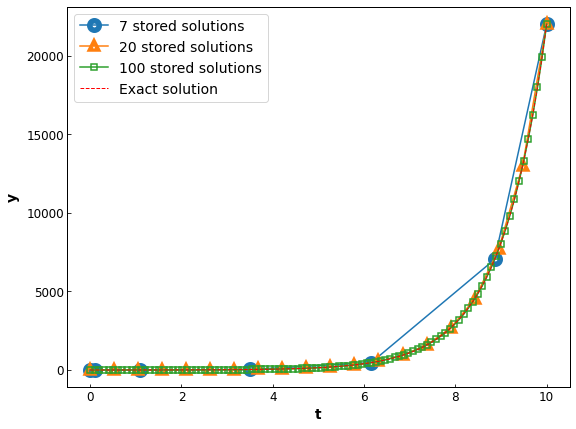

In [5]:
# Plot solution
fig, ax = plt.subplots(1,1,figsize=(9,7))

# Plot solutions
ax.plot(t_sparse, y_sparse[0,:], '-o', linewidth=1.5, mfc='none', ms=9.5, mew=5.5, label='7 stored solutions')
ax.plot(t_medium, y_medium[0,:], '-^', linewidth=1.5, mfc='none', ms=5.5, mew=5.5, label='20 stored solutions')
ax.plot(t_full, y_full[0,:], '-s', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='100 stored solutions')
# Plot exact solution
ax.plot(t, np.exp(t), '--', linewidth=1.0, color='r', label='Exact solution')

# Set axes labels
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$y$')
plt.legend(loc='upper left')

plt.show()

If you want more continuous-like solution, you need to have more points to store solutions. Otherwise the default points selected by the solver will be very sparse (although the solution values are correct). For the following `solve_ivp` use 50 points. You can use more points for smoother solutions.

In [6]:
# Define ODE dy/dt = 0
F1 = lambda t,y: 0
# Solve ODE with RK45
sol1 = solve_ivp(F1, [0,10], [1], t_eval=np.linspace(0,10,50))
# Unpack solution
t1, y1 = sol1.t, sol1.y

In [7]:
# Define ODE dy/dt = t
F2 = lambda t,y: t
# Solve ODE with RK45
sol2 = solve_ivp(F2, [0,10], [1], t_eval=np.linspace(0,10,50))
# Unpack solution
t2, y2 = sol2.t, sol2.y

In [8]:
# Define ODE dy/dt = y
F3 = lambda t,y: y
# Solve ODE with RK45
sol3 = solve_ivp(F3, [0,10], [1], t_eval=np.linspace(0,10,50))
# Unpack solution
t3, y3 = sol3.t, sol3.y

In [9]:
# Define ODE dy/dt = -y
F4 = lambda t,y: -y
# Solve ODE with RK45
sol4 = solve_ivp(F4, [0,10], [1], t_eval=np.linspace(0,10,50))
# Unpack solution
t4, y4 = sol4.t, sol4.y

In [10]:
# Define ODE dy/dt = -sin(t)
F5 = lambda t,y: -np.sin(t)
# Solve ODE with RK45
sol5 = solve_ivp(F5, [0,10], [1], t_eval=np.linspace(0,10,50))
# Unpack solution
t5, y5 = sol5.t, sol5.y

In [11]:
# Define ODE dy/dt = -sin(t)
F6 = lambda t,y: -np.sin(t)
# Solve ODE with RK45 with relative error tolerance
sol6 = solve_ivp(F6, [0,10], [1], t_eval=np.linspace(0,10,50), rtol=1e-6)
# Unpack solution
t6, y6 = sol6.t, sol6.y

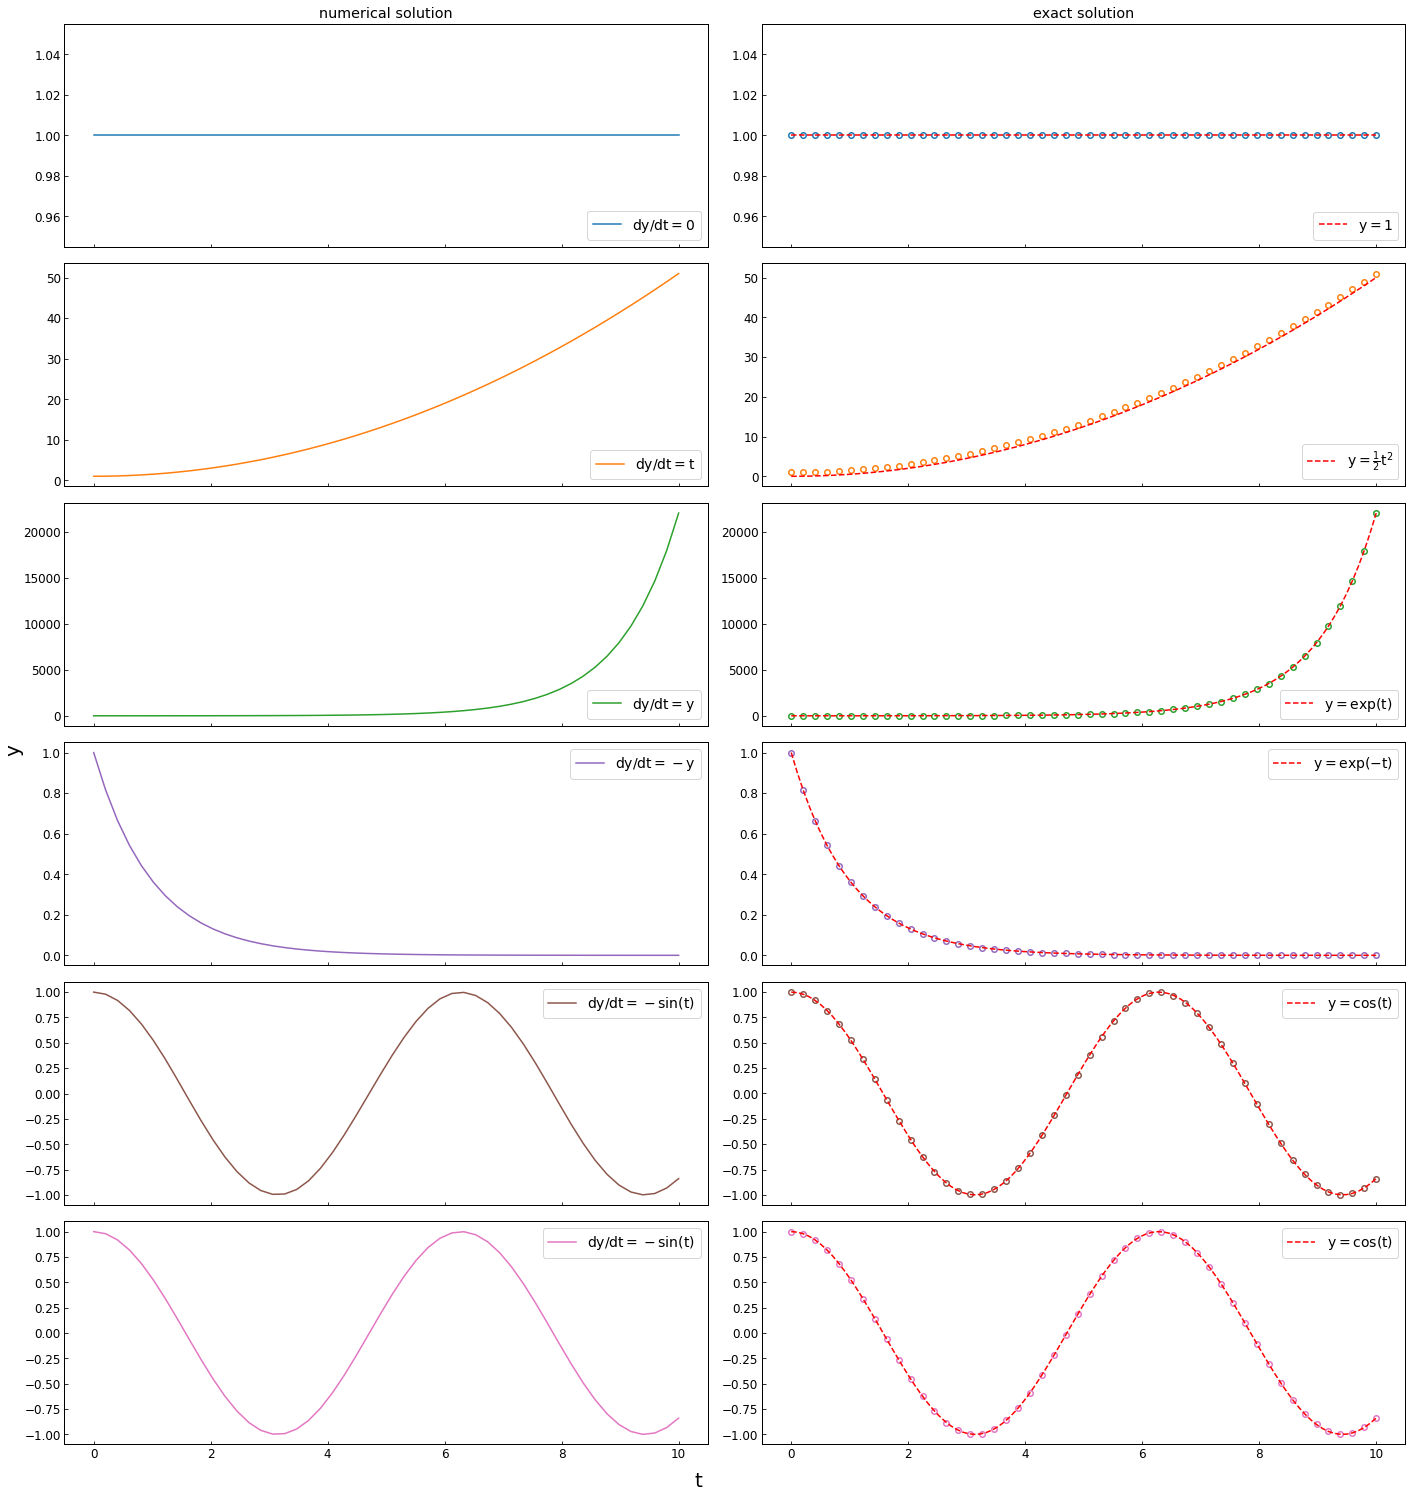

In [12]:
# Plot solution
fig, axs = plt.subplots(6,2,sharex=True,figsize=(20,21))

# Plot dy/dt = 0
axs[0,0].plot(t1, y1[0,:], linewidth=1.5, color='tab:blue', label=r'$dy/dt=0$')
axs[0,0].legend(loc='lower right')
# Plot ODE solution and exact solution
axs[0,1].plot(t1, y1[0,:], 'o', color='tab:blue', mfc='none', ms=5.5, mew=1.5)
axs[0,1].plot(t, e1, '--', linewidth=1.5, color='r', label=r'$y=1$')
axs[0,1].legend(loc='lower right')

# Plot dy/dt = t
axs[1,0].plot(t2, y2[0,:], linewidth=1.5, color='tab:orange', label=r'$dy/dt=t$')
axs[1,0].legend(loc='lower right')
# Plot ODE solution and exact solution
axs[1,1].plot(t2, y2[0,:], 'o', color='tab:orange', mfc='none', ms=5.5, mew=1.5)
axs[1,1].plot(t, e2, '--', linewidth=1.5, color='r', label=r'$y=\frac{1}{2}t^2$')
axs[1,1].legend(loc='lower right')

# Plot dy/dt = y
axs[2,0].plot(t3, y3[0,:], linewidth=1.5, color='tab:green', label=r'$dy/dt=y$')
axs[2,0].legend(loc='lower right')
# Plot ODE solution and exact solution
axs[2,1].plot(t3, y3[0,:], 'o', color='tab:green', mfc='none', ms=5.5, mew=1.5)
axs[2,1].plot(t, e3, '--', linewidth=1.5, color='r', label=r'$y=\exp(t)$')
axs[2,1].legend(loc='lower right')

# Plot dy/dt = -y
axs[3,0].plot(t4, y4[0,:], linewidth=1.5, color='tab:purple', label=r'$dy/dt=-y$')
axs[3,0].legend(loc='upper right')
# Plot ODE solution and exact solution
axs[3,1].plot(t4, y4[0,:], 'o', color='tab:purple', mfc='none', ms=5.5, mew=1.5)
axs[3,1].plot(t, e4, '--', linewidth=1.5, color='r', label=r'$y=\exp(-t)$')
axs[3,1].legend(loc='upper right')

# Plot dy/dt = -sin(t)
axs[4,0].plot(t5, y5[0,:], linewidth=1.5, color='tab:brown', label=r'$dy/dt=-\sin(t)$')
axs[4,0].legend(loc='upper right')
# Plot ODE solution and exact solution
axs[4,1].plot(t5, y5[0,:], 'o', color='tab:brown', mfc='none', ms=5.5, mew=1.5)
axs[4,1].plot(t, e5, '--', linewidth=1.5, color='r', label=r'$y=\cos(t)$')
axs[4,1].legend(loc='upper right')

# Plot dy/dt = -sin(t)
axs[5,0].plot(t6, y6[0,:], linewidth=1.5, color='tab:pink', label=r'$dy/dt=-\sin(t)$')
axs[5,0].legend(loc='upper right')
# Plot ODE solution and exact solution
axs[5,1].plot(t6, y6[0,:], 'o', color='tab:pink', mfc='none', ms=5.5, mew=1.5)
axs[5,1].plot(t, e6, '--', linewidth=1.5, color='r', label=r'$y=\cos(t)$')
axs[5,1].legend(loc='upper right')

# Common/shared axes labels
axs[0,0].set_title('numerical solution')
axs[0,1].set_title('exact solution')
fig.supxlabel(r'$t$')
fig.supylabel(r'$y$')

fig.tight_layout()
plt.show()

We can also use the custom written `ode45` in Python to integrate ODE.

In [13]:
from scipy.integrate import ode

In [14]:
# Creating a function equivalent to ode45 in Matlab
def ode45(f, tint, y0, rtol=1e-9):
    """Python implementation of MATLAB ode45

    Args:
        f (function): differential equation to solve
        tint (list): time interval endpoints
        y0 (list): initial condition
        rtol (float): relative tolerance

    Returns:
        tt (list): time intervel
        rr (list): array of solutions (theta, dtheta)
        
    """
    
    r = ode(f).set_integrator('zvode', method='bdf',rtol=rtol)
    r.set_initial_value(y0, tint[0])
    dt = (tint[1]-tint[0])/100
    t1 = tint[1]
    tt = []
    rr = []
    while r.successful() and r.t < t1:
        tt.append(r.t+dt)
        rr.append(np.real(r.integrate(r.t+dt)))
        
    return tt, rr

In [15]:
# Define ODE dy/dt = 0
F1 = lambda t,y: 0
# Solve ODE with custom ode45
t1, y1 = ode45(F1, [0,10], 1)

# Define ODE dy/dt = t
F2 = lambda t,y: t
# Solve ODE with custom ode45
t2, y2 = ode45(F2, [0,10], 1)

# Define ODE dy/dt = y
F3 = lambda t,y: y
# Solve ODE with custom ode45
t3, y3 = ode45(F3, [0,10], 1)

# Define ODE dy/dt = -y
F4 = lambda t,y: -y
# Solve ODE with custom ode45
t4, y4 = ode45(F4, [0,10], 1)

# Define ODE dy/dt = -sin(t)
F5 = lambda t,y: -np.sin(t)
# Solve ODE with custom ode45
t5, y5 = ode45(F5, [0,10], 1)

# Define ODE dy/dt = -sin(t)
F6 = lambda t,y: -np.sin(t)
# Solve ODE with custom ode45
t6, y6 = ode45(F6, [0,10], 1, rtol=1e-6)

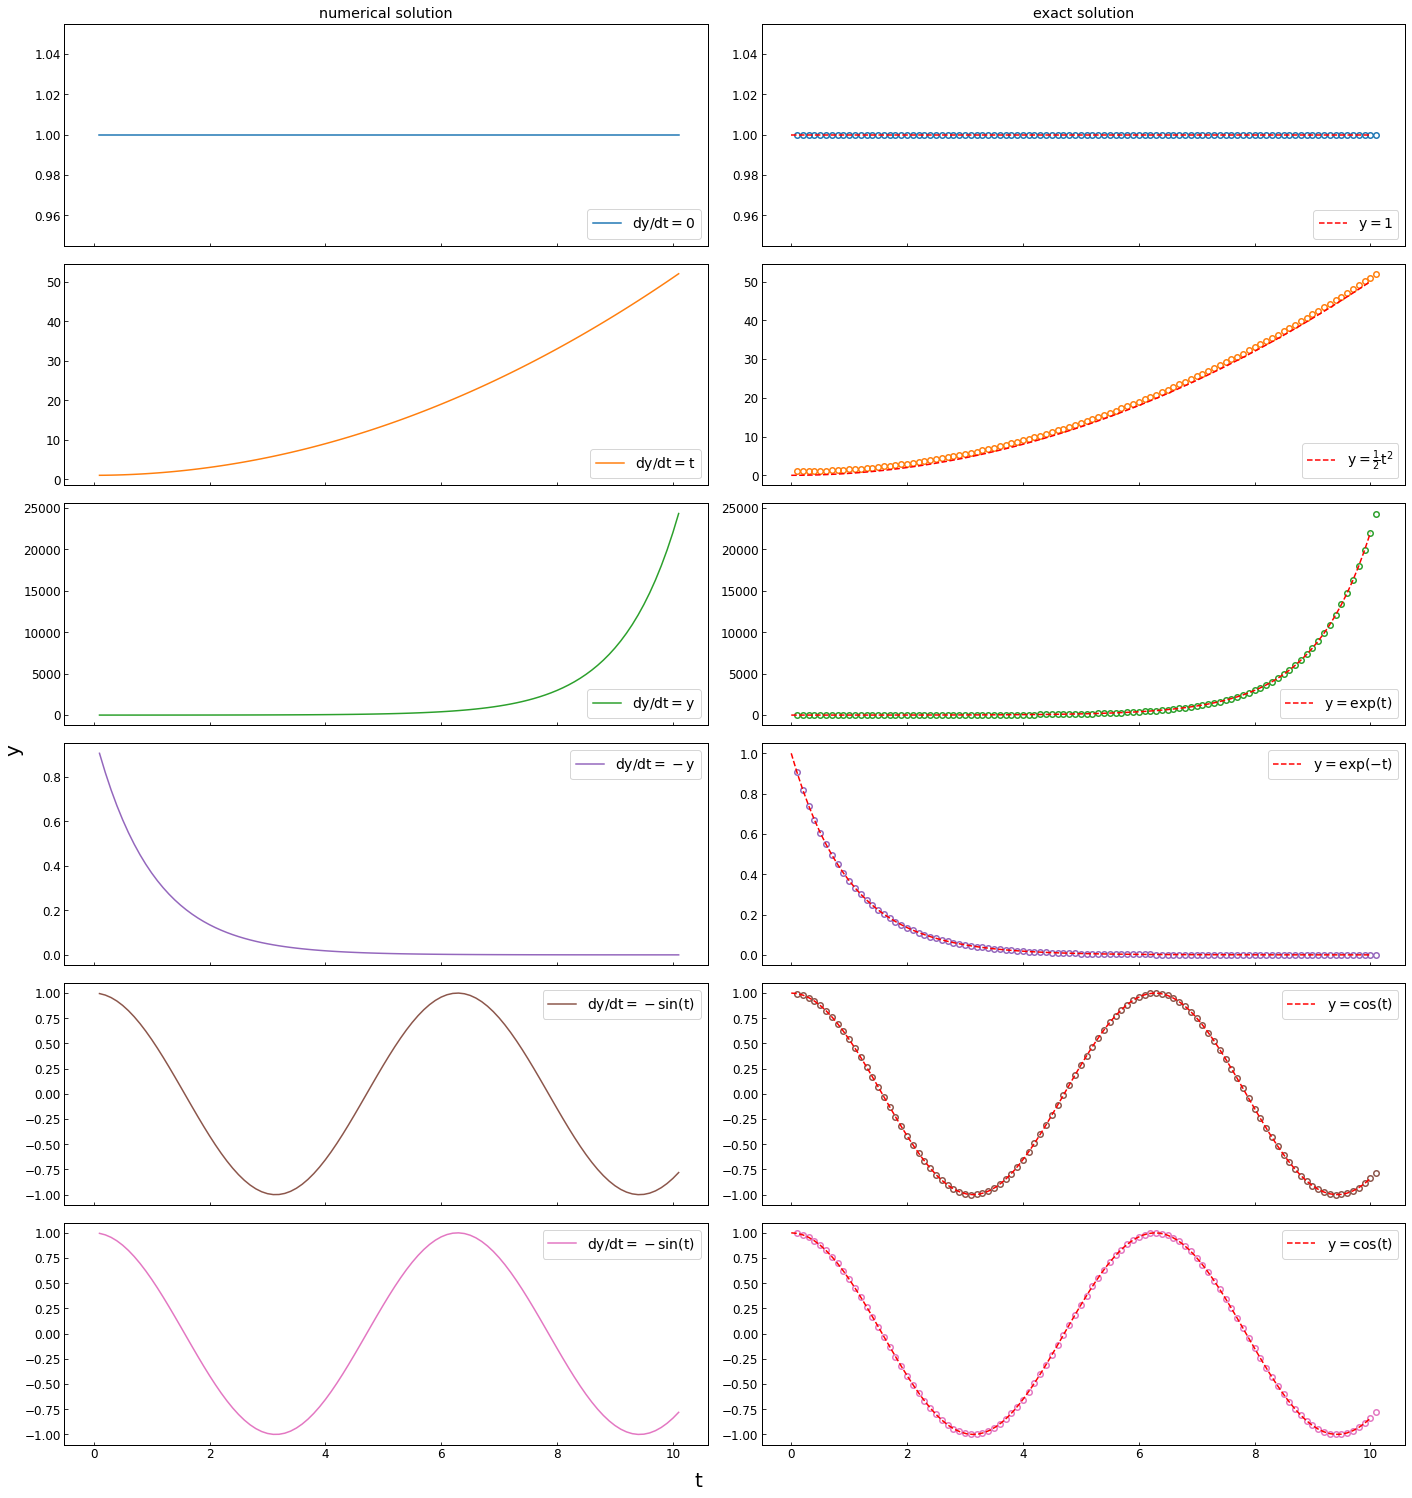

In [16]:
# Plot solution
fig, axs = plt.subplots(6,2,sharex=True,figsize=(20,21))

# Plot dy/dt = 0
axs[0,0].plot(t1, y1, linewidth=1.5, color='tab:blue', label=r'$dy/dt=0$')
axs[0,0].legend(loc='lower right')
# Plot ODE solution and exact solution
axs[0,1].plot(t1, y1, 'o', color='tab:blue', mfc='none', ms=5.5, mew=1.5)
axs[0,1].plot(t, e1, '--', linewidth=1.5, color='r', label=r'$y=1$')
axs[0,1].legend(loc='lower right')

# Plot dy/dt = t
axs[1,0].plot(t2, y2, linewidth=1.5, color='tab:orange', label=r'$dy/dt=t$')
axs[1,0].legend(loc='lower right')
# Plot ODE solution and exact solution
axs[1,1].plot(t2, y2, 'o', color='tab:orange', mfc='none', ms=5.5, mew=1.5)
axs[1,1].plot(t, e2, '--', linewidth=1.5, color='r', label=r'$y=\frac{1}{2}t^2$')
axs[1,1].legend(loc='lower right')

# Plot dy/dt = y
axs[2,0].plot(t3, y3, linewidth=1.5, color='tab:green', label=r'$dy/dt=y$')
axs[2,0].legend(loc='lower right')
# Plot ODE solution and exact solution
axs[2,1].plot(t3, y3, 'o', color='tab:green', mfc='none', ms=5.5, mew=1.5)
axs[2,1].plot(t, e3, '--', linewidth=1.5, color='r', label=r'$y=\exp(t)$')
axs[2,1].legend(loc='lower right')

# Plot dy/dt = -y
axs[3,0].plot(t4, y4, linewidth=1.5, color='tab:purple', label=r'$dy/dt=-y$')
axs[3,0].legend(loc='upper right')
# Plot ODE solution and exact solution
axs[3,1].plot(t4, y4, 'o', color='tab:purple', mfc='none', ms=5.5, mew=1.5)
axs[3,1].plot(t, e4, '--', linewidth=1.5, color='r', label=r'$y=\exp(-t)$')
axs[3,1].legend(loc='upper right')

# Plot dy/dt = -sin(t)
axs[4,0].plot(t5, y5, linewidth=1.5, color='tab:brown', label=r'$dy/dt=-\sin(t)$')
axs[4,0].legend(loc='upper right')
# Plot ODE solution and exact solution
axs[4,1].plot(t5, y5, 'o', color='tab:brown', mfc='none', ms=5.5, mew=1.5)
axs[4,1].plot(t, e5, '--', linewidth=1.5, color='r', label=r'$y=\cos(t)$')
axs[4,1].legend(loc='upper right')

# Plot dy/dt = -sin(t)
axs[5,0].plot(t6, y6, linewidth=1.5, color='tab:pink', label=r'$dy/dt=-\sin(t)$')
axs[5,0].legend(loc='upper right')
# Plot ODE solution and exact solution
axs[5,1].plot(t6, y6, 'o', color='tab:pink', mfc='none', ms=5.5, mew=1.5)
axs[5,1].plot(t, e6, '--', linewidth=1.5, color='r', label=r'$y=\cos(t)$')
axs[5,1].legend(loc='upper right')

# Common/shared axes labels
axs[0,0].set_title('numerical solution')
axs[0,1].set_title('exact solution')
fig.supxlabel(r'$t$')
fig.supylabel(r'$y$')

fig.tight_layout()
plt.show()